## Applying the best model on test data

In [1]:
!pip install catboost
!pip install scikit-learn
!pip install xgboost
!pip install matplotlib
!pip install prettytable
!pip install shap
!pip install seaborn


In [2]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import seaborn            as sns
import itertools
import time
import shap


from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error
from math                    import sqrt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics         import r2_score, mean_squared_error
from sklearn.model_selection import GroupKFold
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from xgboost                 import XGBRegressor
from catboost                import CatBoostRegressor
from sklearn.svm             import SVR
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Ridge
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.neural_network  import MLPRegressor
from matplotlib.colors       import ColorConverter
from prettytable             import PrettyTable


c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [3]:
df = pd.read_csv('Melt_temp_ML.csv')
df

,Number of components,Type of DES,Component#1,Component#2,X#1 (molar fraction),X#2 (molar fraction),"Tmelt, K",Phase diagram (Yes/No),Reference (DOI),Smiles#1,...,fr_Al_COO,fr_Ar_COO,fr_Ar_N,fr_Ar_OH,fr_NH0,fr_NH1,fr_amide,AROM,ALERTS,n_HM
0,2,1,zinc;dichloride,tetraethylazanium;chloride,0.666667,0.333333,364.15,No,10.1039/B106357J,[Cl-].[Cl-].[Zn+2],...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.000000,0.666667
1,2,1,dichlorotin,2-chloroethyl(trimethyl)azanium;chloride,0.666667,0.333333,343.15,No,10.1039/B106357J,[Cl-].[Sn+2].[Cl-],...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667
2,2,1,zinc;dichloride,2-chloroethyl(trimethyl)azanium;chloride,0.666667,0.333333,297.15,No,10.1039/B106357J,[Cl-].[Cl-].[Zn+2],...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667
3,2,1,dichlorotin,2-acetyloxyethyl(trimethyl)azanium;chloride,0.666667,0.333333,287.15,No,10.1039/B106357J,[Cl-].[Sn+2].[Cl-],...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667
4,2,1,zinc;dichloride,2-acetyloxyethyl(trimethyl)azanium;chloride,0.666667,0.333333,304.15,No,10.1039/B106357J,[Cl-].[Cl-].[Zn+2],...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,2,IL,2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.303000,0.697000,317.60,Yes,10.1016/j.fluid.2017.03.015,C[N+](C)(C)CCO.[Cl-],...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.697,1.000000,0.000000
2265,2,IL,2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.222000,0.778000,330.50,Yes,10.1016/j.fluid.2017.03.015,C[N+](C)(C)CCO.[Cl-],...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.778,1.000000,0.000000
2266,2,IL,2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.197000,0.803000,331.50,Yes,10.1016/j.fluid.2017.03.015,C[N+](C)(C)CCO.[Cl-],...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.803,1.000000,0.000000
2267,2,IL,2-hydroxyethyl(trimethyl)azanium;chloride,benzyl-(2-hydroxyethyl)-dimethylazanium;chloride,0.114000,0.886000,338.80,Yes,10.1016/j.fluid.2017.03.015,C[N+](C)(C)CCO.[Cl-],...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.886,1.000000,0.000000


In [4]:
df.columns

Index(['Number of components', 'Type of DES', 'Component#1', 'Component#2',
       'X#1 (molar fraction)', 'X#2 (molar fraction)', 'Tmelt, K',
       'Phase diagram (Yes/No)', 'Reference (DOI)', 'Smiles#1', 'Smiles#2',
       'Tmelt#1', 'Tmelt#2', 'MW', 'HBD_total', 'fr_Al_COO', 'fr_Ar_COO',
       'fr_Ar_N', 'fr_Ar_OH', 'fr_NH0', 'fr_NH1', 'fr_amide', 'AROM', 'ALERTS',
       'n_HM'],
      dtype='object')

In [5]:
# creating a DataFrame df_unique with a list of unique combinations from component columns
df_unique = df[['Component#1', 'Component#2']].drop_duplicates()
df_unique = df_unique.reset_index(drop=True)
df_unique = df_unique.reset_index()  # convert indexes to a column
df_unique['index_col'] = df_unique['index']  # create a new column and assign it the values of the column with indexes
# combine df2 and df_unique by Component#1 and Component#2 columns
merged = df.merge(df_unique, on=['Component#1', 'Component#2'])
# create the indexes column and fill it with values from the index column from df_unique
merged['indexes'] = merged['index']
# we remove the index column from merged, since we no longer need it
merged.drop('index', axis=1, inplace=True)
df = merged.drop(['Number of components', 'Component#1', 'Component#2', 'X#2 (molar fraction)',
                  'Phase diagram (Yes/No)', 'Reference (DOI)', 'Smiles#1', 'Smiles#2', 'index_col'], axis=1)
# moving the column 'Tmelt, K' to the first place
df = df[['Tmelt, K', 'X#1 (molar fraction)', 'Type of DES', 'Tmelt#1', 'Tmelt#2', 'MW', 'HBD_total', 'fr_Al_COO', 'fr_Ar_COO', 
         'fr_Ar_N', 'fr_Ar_OH', 'fr_NH0', 'fr_NH1', 'fr_amide', 'AROM', 'ALERTS', 'n_HM', 'indexes']]
# One-hot encoding
one_hot = pd.get_dummies(df['Type of DES'])
# Concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df, one_hot], axis=1)
# Drop the original 'Category' column
df = df.drop('Type of DES', axis=1)
# Columns to move
columns_to_move = ['1',	'2', '3', '4', '5', 'IL']
# The column after which you need to move the columns
target_column = 'X#1 (molar fraction)'
# Find the index of the target column
target_index = df.columns.get_loc(target_column)
# Moving columns
for col in reversed(columns_to_move):
    # Copy the column
    temp_col = df.pop(col)
    # Insert a column after the target column
    df.insert(target_index + 1, col, temp_col)
df = df.rename(columns={'indexes': 'ind_syst'})

In [6]:
df

,"Tmelt, K",X#1 (molar fraction),1,2,3,4,5,IL,Tmelt#1,Tmelt#2,...,fr_Ar_COO,fr_Ar_N,fr_Ar_OH,fr_NH0,fr_NH1,fr_amide,AROM,ALERTS,n_HM,ind_syst
0,364.15,0.666667,1,0,0,0,0,0,563.15,633.15,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.000000,0.666667,0
1,343.15,0.666667,1,0,0,0,0,0,519.15,498.15,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667,1
2,297.15,0.666667,1,0,0,0,0,0,563.15,498.15,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667,2
3,287.15,0.666667,1,0,0,0,0,0,519.15,423.65,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,1.333333,0.666667,3
4,293.15,0.666700,1,0,0,0,0,0,519.15,423.65,...,0.0,0.0,0.0,0.333300,0.0,0.0,0.000,1.333300,0.666700,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,317.60,0.303000,0,0,0,0,0,1,578.15,351.42,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.697,1.000000,0.000000,377
2265,330.50,0.222000,0,0,0,0,0,1,578.15,351.42,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.778,1.000000,0.000000,377
2266,331.50,0.197000,0,0,0,0,0,1,578.15,351.42,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.803,1.000000,0.000000,377
2267,338.80,0.114000,0,0,0,0,0,1,578.15,351.42,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.886,1.000000,0.000000,377


### Splitting data into test and train

In [7]:
# # Splitting the mixes-out data (divide the dataset by y_validate and X, divide X by 5 folds. 1 fold: x_train, y_train, x_test, y_test)
def mix_out(x,y,groups,n_splits,test_size):
    mix_out = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    for train_idx, test_idx in kfold.split(x, y, groups):
        mix_out.append((train_idx, test_idx))
    return mix_out

valid_list = []
xy_list = []
valid_list_s = []
xy_list_s = []

# Splitting the selection
y = df.loc[:,'Tmelt, K']
x = df.loc[:,'X#1 (molar fraction)':]
mixture_out = mix_out(x, y, df['ind_syst'], 1, 0.2)
for train_idx, val_idx in mixture_out:
    valid_list.append((x.iloc[train_idx],
                       x.iloc[val_idx],
                       y.iloc[train_idx],
                       y.iloc[val_idx]))

mixture_out = mix_out(valid_list[0][0], valid_list[0][2], valid_list[0][0]['ind_syst'], 5, 0.2)
for train_idx, val_idx in mixture_out:
    # [[x_train, x_test, y_train, y_test], [], [], [], []]
    xy_list.append((valid_list[0][0].iloc[train_idx],
                    valid_list[0][0].iloc[val_idx],
                    valid_list[0][2].iloc[train_idx],
                    valid_list[0][2].iloc[val_idx]))

# Removing the 'ing_syst' column from datasets in the valid_list list
for i, (x_train, x_val, y_train, y_val) in enumerate(valid_list):
    valid_list[i] = (x_train.drop('ind_syst', axis=1),
                     x_val.drop('ind_syst', axis=1),
                     y_train,
                     y_val)

# Removing the 'ing_syst' column from datasets in the xy_list list
for i, (x_train, x_test, y_train, y_test) in enumerate(xy_list):
    xy_list[i] = (x_train.drop('ind_syst', axis=1),
                  x_test.drop('ind_syst', axis=1),
                  y_train,
                  y_test)

# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Works better with a list
valid_list_s.append([scaler_x.fit_transform(valid_list[0][0]),
                scaler_x.transform(valid_list[0][1]),
                scaler_y.fit_transform(valid_list[0][2].values.reshape(-1, 1)),
                scaler_y.transform(valid_list[0][3].values.reshape(-1, 1))])
for fold in range(len(xy_list)):
    xy_list_s.append([scaler_x.fit_transform(xy_list[fold][0]),
                scaler_x.transform(xy_list[fold][1]),
                scaler_y.fit_transform(xy_list[fold][2].values.reshape(-1, 1)),
                scaler_y.transform(xy_list[fold][3].values.reshape(-1, 1))])

### Functions for plotting and calculating metrics

In [8]:
def compute_type(xy_list, model, types=['1', '2', '3', '4', '5', 'IL']):
    results_dict = {}
    for type in types:
        type_list = []
        for X_train, X_test, y_train, y_test in xy_list:
            type_list.append((X_train[X_train[type]==1], X_test[X_test[type]==1], y_train.loc[X_train[X_train[type]==1].index], y_test.loc[X_test[X_test[type]==1].index]))

        r2_list = []
        rmse_list = []
        r2_train_list = []
        rmse_train_list = []

        for X_train, X_test, y_train, y_test in type_list:
            # Normalize the data
            if len(X_train) > 2 and len(X_test) > 2:
                scaler_x = MinMaxScaler()
                scaler_y = MinMaxScaler()
                X_train_scaled = scaler_x.fit_transform(X_train)
                X_test_scaled = scaler_x.transform(X_test)
                y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()
                y_test_scaled = scaler_y.transform(np.array(y_test).reshape(-1,1)).ravel()

                # Train the model
                model.fit(X_train_scaled, y_train_scaled)

                # Predict
                y_pred = model.predict(X_test_scaled)
                y1_pred = model.predict(X_train_scaled)

                # Transform the predictions back to the original scale
                y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
                y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
                y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()

                # Calculate metrics
                r2 = r2_score(y_test, y_pred)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                r2_train = r2_score(y_train, y1_pred)
                rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))

                r2_list.append(r2)
                rmse_list.append(rmse)
                r2_train_list.append(r2_train)
                rmse_train_list.append(rmse_train)
                
            if len(X_train) < 3:
                r2_list.append(np.nan)
                rmse_list.append(np.nan)
                r2_train_list.append(np.nan)
                rmse_train_list.append(np.nan)
                
            if len(X_train) > 2 and len(X_test) < 3:
                scaler_x = MinMaxScaler()
                scaler_y = MinMaxScaler()
                X_train_scaled = scaler_x.fit_transform(X_train)
                y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1,1)).ravel()

                # Train the model
                model.fit(X_train_scaled, y_train_scaled)

                # Predict
                y1_pred = model.predict(X_train_scaled)

                # Transform the predictions back to the original scale
                y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()

                # Calculate metrics
                r2_train = r2_score(y_train, y1_pred)
                rmse_train = np.sqrt(mean_squared_error(y_train, y1_pred))

                r2_list.append(np.nan)
                rmse_list.append(np.nan)
                r2_train_list.append(r2_train)
                rmse_train_list.append(rmse_train)
                
        r2_list = [x if not np.isnan(x) else np.nanmean(r2_list) for x in r2_list]
        rmse_list = [x if not np.isnan(x) else np.nanmean(rmse_list) for x in rmse_list]
        r2_train_list = [x if not np.isnan(x) else np.nanmean(r2_train_list) for x in r2_train_list]
        rmse_train_list = [x if not np.isnan(x) else np.nanmean(rmse_train_list) for x in rmse_train_list]

        results_dict[type] = [
            ["R2 CV", np.nanmean(r2_list) if not np.isnan(np.nanmean(r2_list)) else 0, *r2_list],
            ["RMSE CV", np.nanmean(rmse_list) if not np.isnan(np.nanmean(rmse_list)) else 0, *rmse_list],
            ["R2 Train", np.nanmean(r2_train_list) if not np.isnan(np.nanmean(r2_train_list)) else 0, *r2_train_list],
            ["RMSE Train", np.nanmean(rmse_train_list) if not np.isnan(np.nanmean(rmse_train_list)) else 0, *rmse_train_list]
]

    return results_dict


In [18]:
df.rename(columns = {
    'X#1 (molar fraction)': 'Molar fraction of component#1',
    '1': 'Type I',
    '2': 'Type II',
    '3': 'Type III',
    '4': 'Type IV',
    '5': 'Type V',
    'IL': 'Type IL',
    'Tmelt#1': 'Melting temperature of component#1, K',
    'Tmelt#2': 'Melting temperature of component#2, K',
    'MW': 'Molecular weight, g/mol',
    'HBD_total': 'Number of hydrogen bond donors',
    'fr_Al_COO': 'Number of aliphatic carboxylic acids',
    'fr_Ar_COO': 'Number of aromatic carboxylic acide',
    'fr_Ar_N': 'Number of aromatic nitrogens',
    'fr_Ar_OH': 'Number of aromatic hydroxyl groups',
    'fr_NH0': 'Number of Tertiary amines',
    'fr_NH1': 'Number of Secondary amines',
    'fr_amide': 'Number of amides',
    'AROM': 'Number of aromatic rings',
    'ALERTS': 'Chemical toxicity evaluation',
    'n_HM': 'Number of heavy atoms'
}, inplace = True )




In [20]:
#Let's introduce the Feature importance function
list_columns = df.loc[:, 'Molar fraction of component#1' : 'Number of heavy atoms'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[0], title='Feature importance', feature_names=list_columns, max_display = 10)

In [9]:
# palette of colors
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d']

# font for all charts
plt.rcParams.update({'font.size': 16})

## Applying the best model on test data

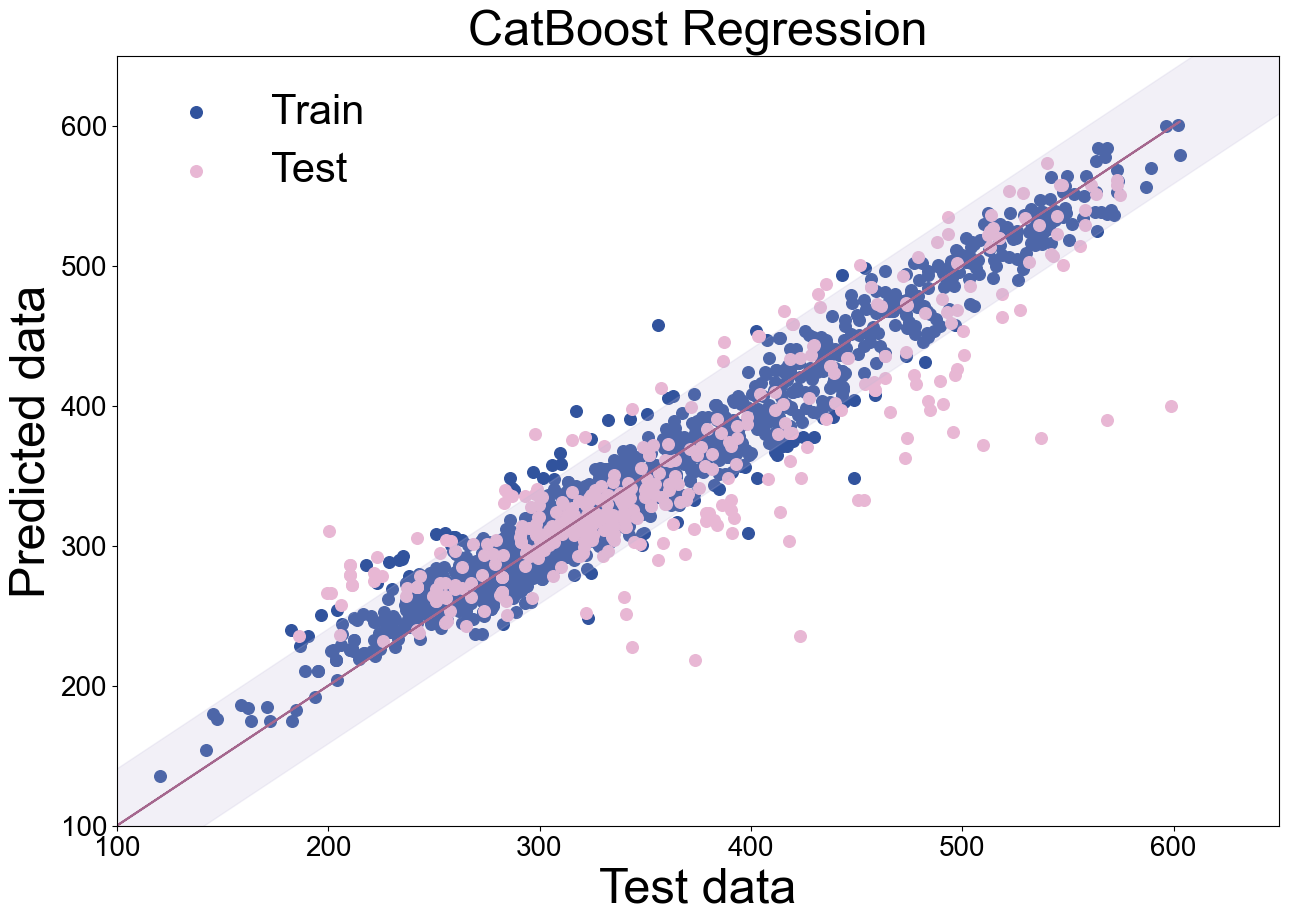

R2 train: 0.9497573356272522
RMSE train: 17.322313928536072
R2 test: 0.7801028616478795
RMSE test: 41.00282311219024
AARD =  8.016412178562858


In [10]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Color palette
param_grid = {
    'learning_rate': 0.251,
    'depth': 6,
    'l2_leaf_reg': 10,
    'iterations': 100,
    'border_count': 50,
    'bagging_temperature': 4,
    'random_strength': 4
}

r2_list = []
r2_train_list = []
rmse_list = []
rmse_train_list = []
results = []
results_train = []

model = CatBoostRegressor(**param_grid, verbose=False)
# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_x.fit_transform(valid_list[0][0])
X_test_scaled = scaler_x.transform(valid_list[0][1])
y_train_scaled = scaler_y.fit_transform(np.array(valid_list[0][2]).reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(np.array(valid_list[0][3]).reshape(-1,1)).ravel()
# Train the model
model.fit(X_train_scaled, y_train_scaled)
# Predict
y_pred = model.predict(X_test_scaled)
y1_pred = model.predict(X_train_scaled)
# Transform the predictions back to the original scale
y_test = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).ravel()
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1,1)).ravel()
y1_pred = scaler_y.inverse_transform(y1_pred.reshape(-1,1)).ravel()
# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_train = r2_score(valid_list[0][2], y1_pred)
rmse_train = np.sqrt(mean_squared_error(valid_list[0][2], y1_pred))

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(valid_list[0][2], y1_pred, color=colors[4], s=70, label='Train')
ax.scatter(y_test, y_pred, color=colors[1], s=70, label='Test')
ax.plot(valid_list[0][2], valid_list[0][2], color=colors[0])
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(100, 650)
plt.ylim(100, 650)
x = np.linspace(100, 650, 100)
ax.fill_between(x, x-rmse, x+rmse, interpolate=True, color=colors[2], alpha=0.2)
ax.set_xlabel('Test data', fontsize=35)
ax.set_ylabel('Predicted data', fontsize=35)
ax.set_title('CatBoost Regression', fontsize=35)
ax.legend(fontsize = 30, frameon=False)
plt.style.use('seaborn')
plt.show()

def calculate_aard(true_values, predicted_values):
    absolute_diff = np.abs(predicted_values - true_values)
    relative_diff = absolute_diff / true_values
    aard = np.mean(relative_diff) * 100  # Переводим в проценты
    return aard
aard = calculate_aard(y_test, y_pred)

print('R2 train:', r2_train)
print('RMSE train:', rmse_train)
print('R2 test:', r2)
print('RMSE test:', rmse)
print('AARD = ', aard)

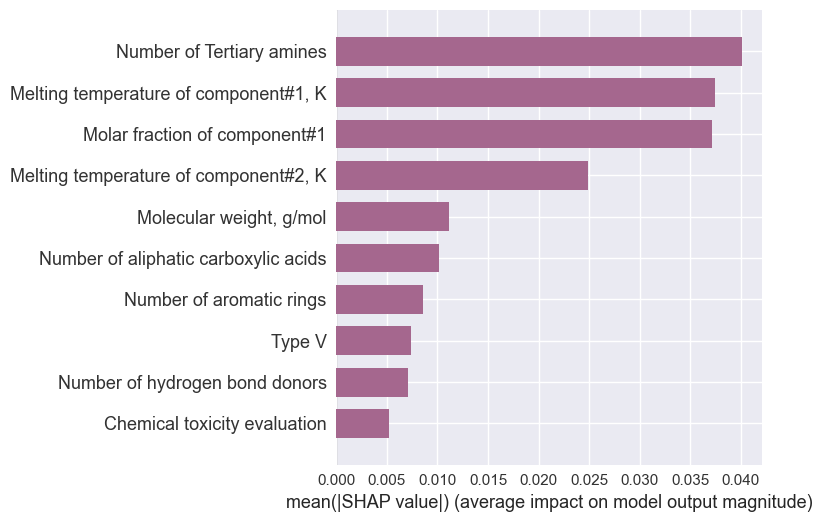

In [21]:
regr_feature(model, X_test_scaled, list_columns)

In [22]:
#Saving the model
import pickle
filename = 'melt_temp_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    file.close()